0 -> 8, 4, 6, 1
1 -> 0, 8
2 -> 6, 9, 3
3 -> 6, 2
4 -> 0, 6
6 -> 0, 3, 4, 2
7 -> 9
8 -> 0, 1, 9
9 -> 2, 8, 7
Grafo iniziale:


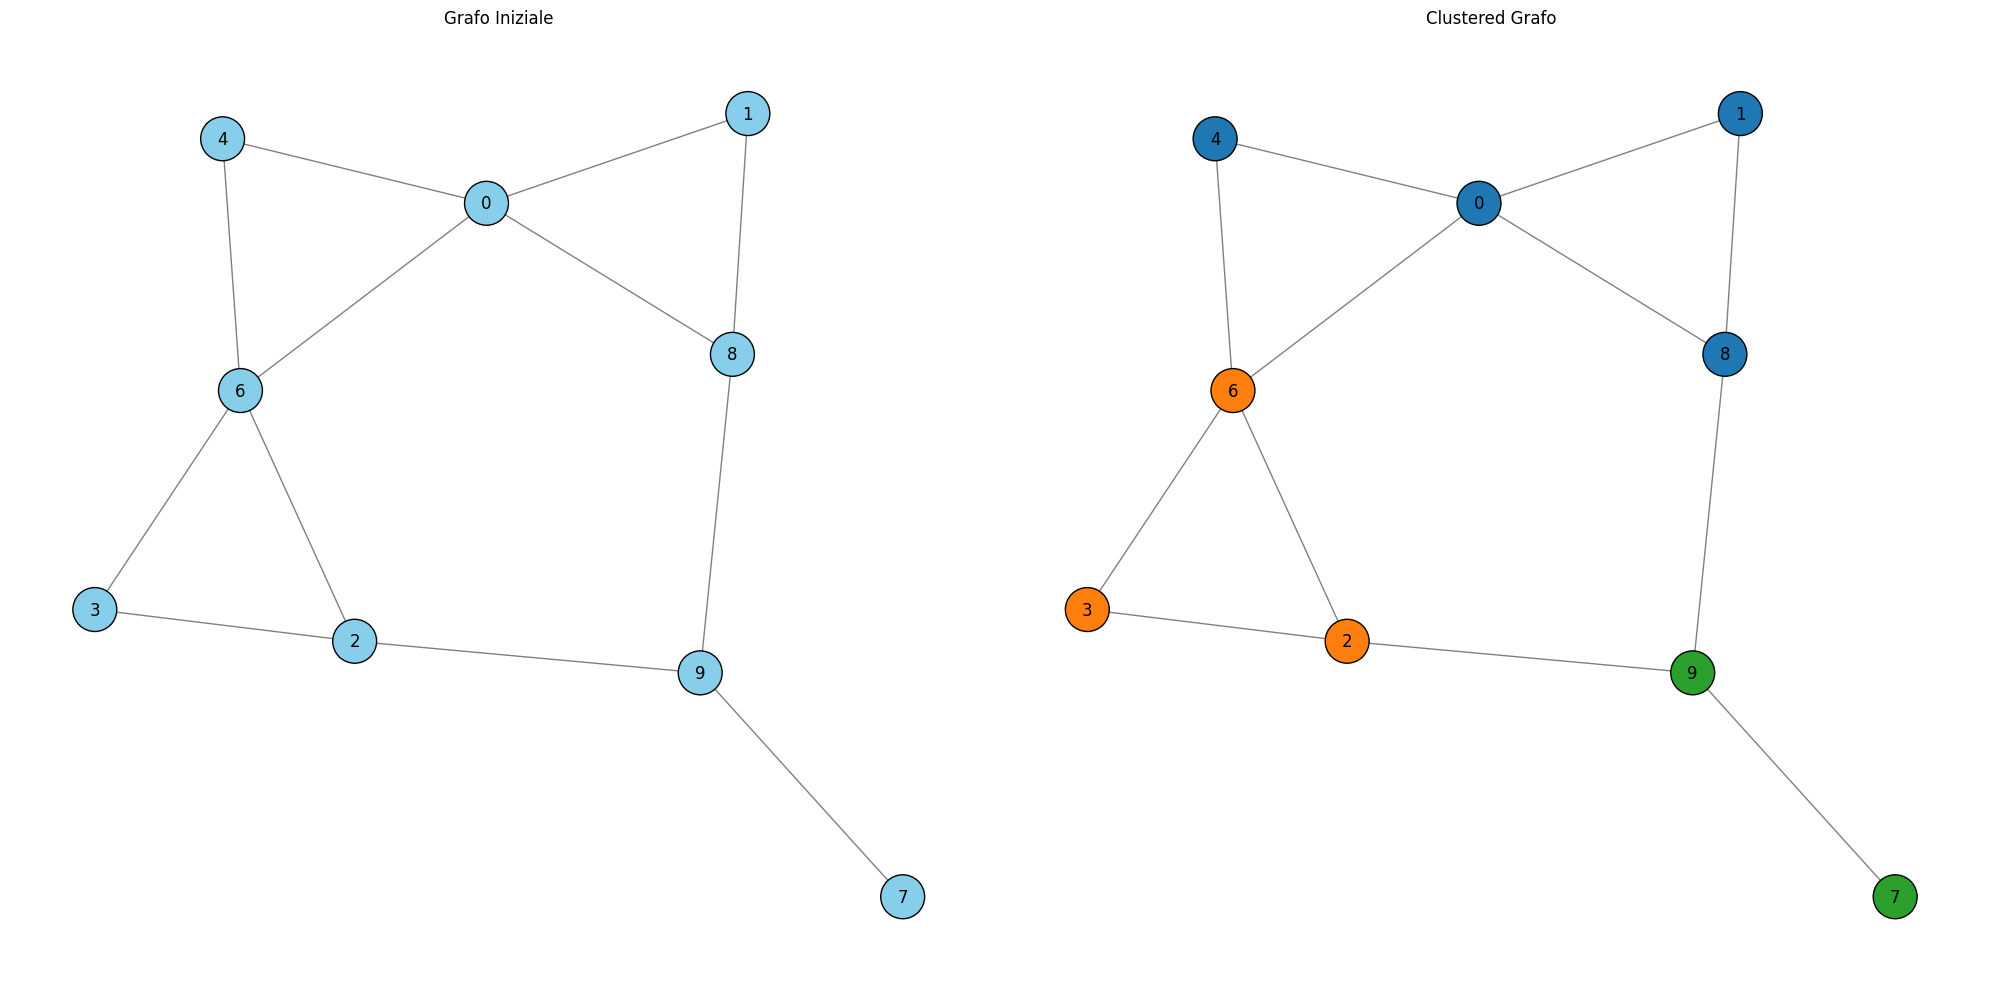

In [120]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain 
import itertools


def plot_graph(graph, title, subplot_position=None, filename=None, colors=None):
    if subplot_position:
        plt.subplot(subplot_position)
    else:
        plt.figure()
        
    pos = nx.spring_layout(graph, seed=42)
    labels = {node: str(node) for node in graph.nodes()}

    node_colors = {node: 'skyblue' for node in graph.nodes()}
    if colors:
        color_cycle = itertools.cycle(plt.cm.tab10.colors)
        for i, cluster in enumerate(colors):
            color = next(color_cycle)
            for node in cluster:
                node_colors[int(node)] = color

    nx.set_node_attributes(graph, node_colors, 'color')

    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=1000, node_color=list(node_colors.values()), font_size=12, font_color='black', edge_color='gray', edgecolors='black', linewidths=1)

    plt.title(title)
    if filename and not subplot_position:
        plt.savefig(filename)
    if not subplot_position:
        plt.show()

""" def plot_graph(graph, title, filename=None, colors=None):
    pos = nx.spring_layout(graph, seed=42)
    labels = {node: str(node) for node in graph.nodes()}
    
    # Assegna un colore di default (skyblue) a tutti i nodi
    node_colors = {node: 'skyblue' for node in graph.nodes()}
    
    if colors:
        color_cycle = itertools.cycle(plt.cm.tab10.colors)
        for i, cluster in enumerate(colors):
            color = next(color_cycle)
            for node in cluster:
                node_colors[int(node)] = color

    nx.set_node_attributes(graph, node_colors, 'color')

    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=1000, node_color=list(node_colors.values()), font_size=12, font_color='black', edge_color='gray', edgecolors='black', linewidths=1)

    plt.title(title)
    if filename:
        plt.savefig(filename)
    plt.show() """


class Graph:
    def __init__(self):
        self.grafo = {}

    def aggiungi_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = []

    def aggiungi_arco(self, u, v):
        if u in self.grafo and v in self.grafo:
            self.grafo[u].append(v)
            self.grafo[v].append(u)  # Se il grafo è non diretto, aggiungi anche l'arco inverso

    def stampa_grafo(self):
        for vertice in self.grafo:
            adiacenti = ", ".join(str(v) for v in self.grafo[vertice])
            print(f"{vertice} -> {adiacenti}")

def converti_grafo_personalizzato_in_networkx(grafo_personalizzato):
    G = nx.Graph()
    for vertice, adiacenti in grafo_personalizzato.grafo.items():
        G.add_node(vertice)
        for adiacente in adiacenti:
            G.add_edge(vertice, adiacente)
    return G

def find_min_degree_node(graph):
    min_degree = float('inf')
    node_with_min_degree = None
    for node in graph.nodes():
        degree = len(graph.edges(node))
        if degree < min_degree:
            min_degree = degree
            node_with_min_degree = node
    return node_with_min_degree, min_degree

def find_incident_edges(graph, node):
    incident_edges = []
    for u, v in graph.edges():
        if u == node or v == node:
            incident_edges.append((u, v))
    return incident_edges

def find_min_shared_edges(cluster, clusters):
    min_shared_edges = float('inf')
    selected_cluster = None
    for other_cluster in clusters:
        if other_cluster == cluster:
            continue
        shared_edges = 0
        for node in cluster:
            shared_edges += sum(1 for u, v in G_initial.edges(node) if u in other_cluster or v in other_cluster)
        if shared_edges < min_shared_edges:
            min_shared_edges = shared_edges
            selected_cluster = other_cluster
    return selected_cluster

def divide_into_clusters(graph, k):
    # Calcola la migliore partizione del grafo con l'algoritmo di Louvain
    partition = community_louvain.best_partition(graph)

    # Organizza i nodi nei cluster in base alla partizione
    clusters = [[] for _ in range(k)]
    for node, cluster_index in partition.items():
        clusters[cluster_index].append(node)

    return clusters

if __name__ == "__main__":
    grafo = Graph()

    # Aggiungi i vertici
    grafo.aggiungi_vertice(0)
    grafo.aggiungi_vertice(1)
    grafo.aggiungi_vertice(2)
    grafo.aggiungi_vertice(3)
    grafo.aggiungi_vertice(4)
    grafo.aggiungi_vertice(6)
    grafo.aggiungi_vertice(7)
    grafo.aggiungi_vertice(8)
    grafo.aggiungi_vertice(9)

    # Aggiungi gli archi
    grafo.aggiungi_arco(0, 8)
    grafo.aggiungi_arco(0, 4)
    grafo.aggiungi_arco(0, 6)
    grafo.aggiungi_arco(1, 0)
    grafo.aggiungi_arco(1, 8)
    grafo.aggiungi_arco(6, 3)
    grafo.aggiungi_arco(6, 4)
    grafo.aggiungi_arco(6, 2)
    grafo.aggiungi_arco(2, 9)
    grafo.aggiungi_arco(3, 2)
    grafo.aggiungi_arco(8, 9)
    grafo.aggiungi_arco(9, 7)

    # Stampa il grafo
    grafo.stampa_grafo()
    
    plt.figure(figsize=(20, 10))  # Crea una nuova figura

    # Disegno del grafo iniziale
    G_initial = converti_grafo_personalizzato_in_networkx(grafo)
    print("Grafo iniziale:")
    plot_graph(G_initial, "Grafo Iniziale", 121)  # Aggiungi la posizione del subplot

    # Divisione in cluster
    k = 4
    clusters = divide_into_clusters(G_initial, k)

    # Il tuo codice di stampa dei cluster ...

    # Disegna il grafo con colori diversi per le varie partizioni tra nodi
    plot_graph(G_initial, "Clustered Grafo", 122, colors=clusters)  # Aggiungi la posizione del subplot

    plt.tight_layout()
    plt.savefig("grafo.png")  # Salva l'immagine finale
    plt.show()  # Mostra l'immagine finale

    """ # Disegno del grafo iniziale
    G_initial = converti_grafo_personalizzato_in_networkx(grafo)
    print("Grafo iniziale:")
    plot_graph(G_initial, "Grafo Iniziale", filename="grafo_iniziale.png")

    # Divisione in cluster
    k = 4
    clusters = divide_into_clusters(G_initial, k)

    # Stampa i cluster
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {cluster}")

    # Assegna i nodi ai cluster sulla base della partizione
    node_to_cluster = {}
    for i, cluster in enumerate(clusters):
        for node in cluster:
            node_to_cluster[node] = i

    # Stampa l'assegnazione dei nodi ai cluster
    for node, cluster in node_to_cluster.items():
        print(f"Nodo {node} appartiene al Cluster {cluster+1}")

    # Disegna il grafo con colori diversi per le varie partizioni tra nodi
    plot_graph(G_initial, "Clustered Grafo", filename="grafo_clustered.png", colors=clusters) """


### Senza  l'algoritmo di clustering di Louvain.

#### Utilizzo di un algoritmo gerarchico

Questo algoritmo inizia assegnando ciascun nodo al suo cluster e poi, ad ogni passo, fonde i due cluster più vicini fino a quando non rimangono solo k cluster. La "vicinanza" tra due cluster può essere definita in vari modi; in questo esempio, useremo la distanza minima tra i nodi di due cluster differenti.

0 -> 8, 4, 6, 1
1 -> 0, 8
2 -> 6, 9, 3
3 -> 6, 2
4 -> 0, 6
6 -> 0, 3, 4, 2
7 -> 9
8 -> 0, 1, 9
9 -> 2, 8, 7
Grafo iniziale:


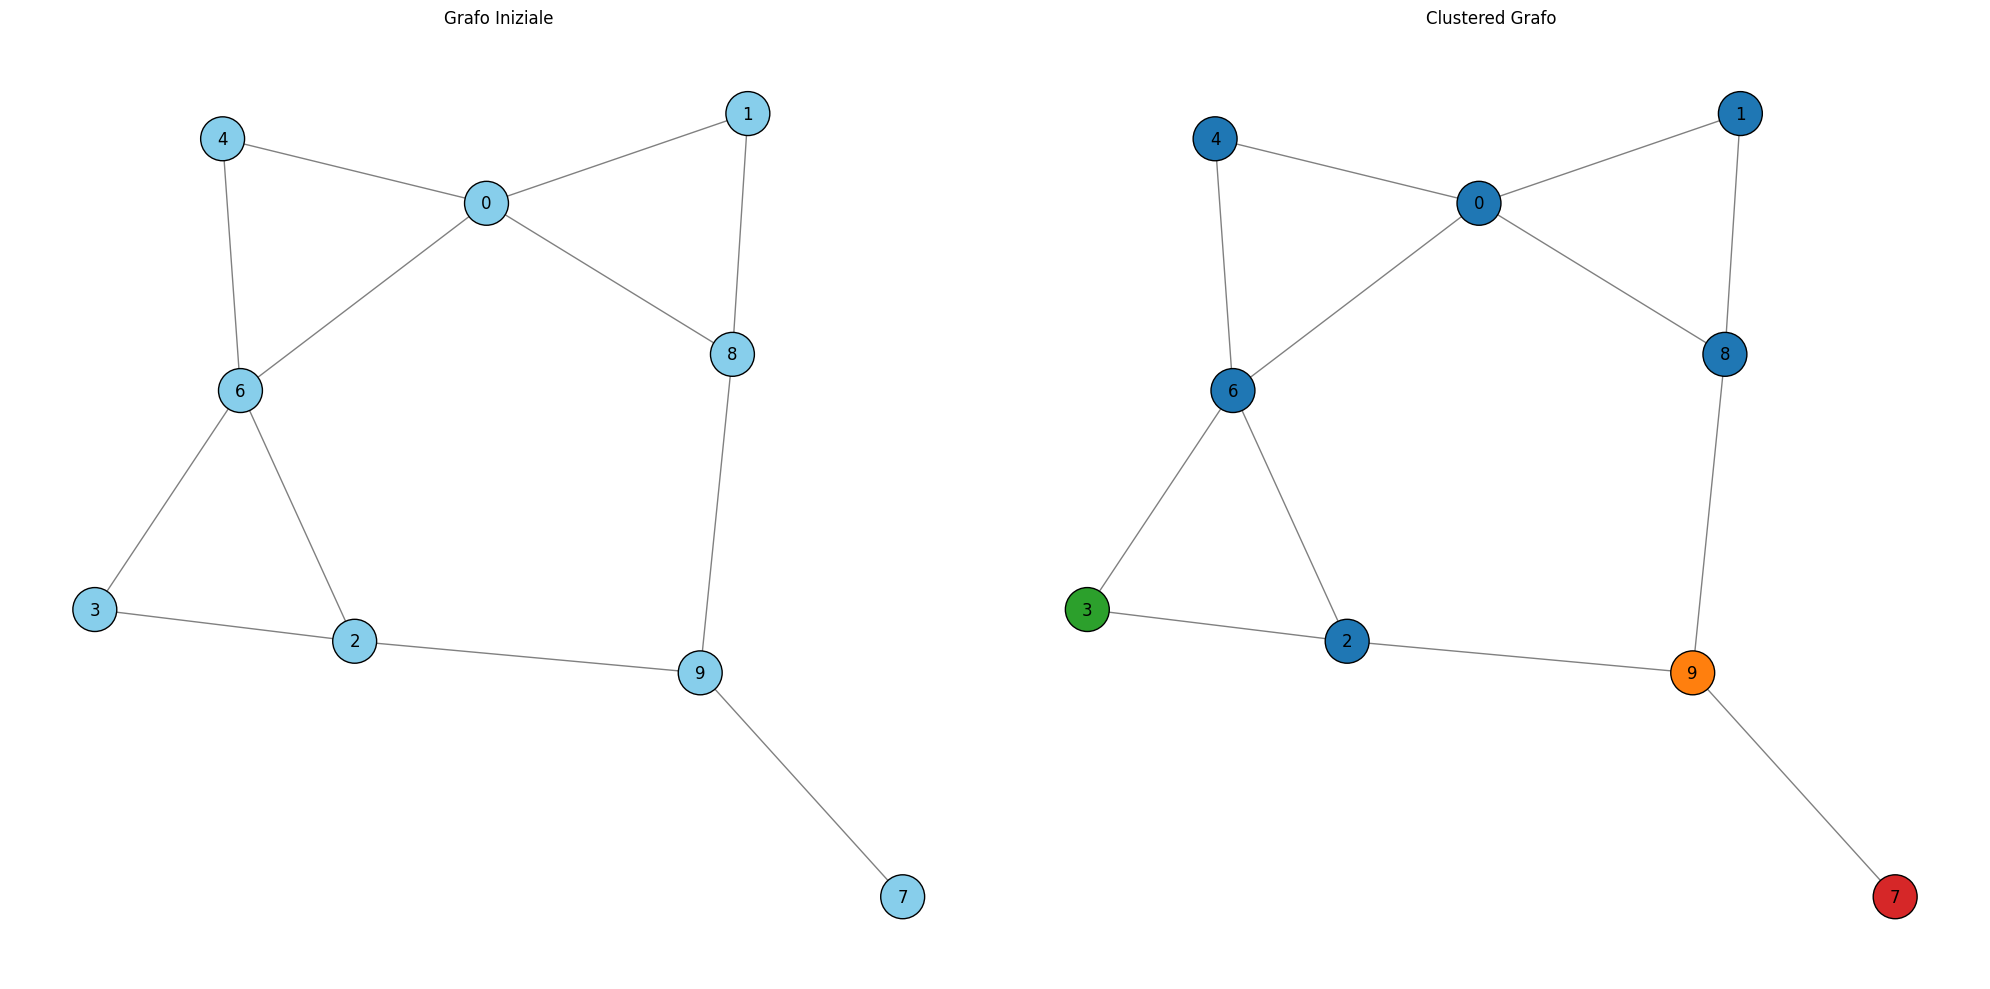

In [121]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

def plot_graph(graph, title, subplot, colors=None):
    pos = nx.spring_layout(graph, seed=42)
    labels = {node: str(node) for node in graph.nodes()}

    node_colors = {node: 'skyblue' for node in graph.nodes()}
    if colors:
        color_cycle = itertools.cycle(plt.cm.tab10.colors)
        for i, cluster in enumerate(colors):
            color = next(color_cycle)
            for node in cluster:
                node_colors[int(node)] = color

    nx.set_node_attributes(graph, node_colors, 'color')

    plt.subplot(subplot)
    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=1000, node_color=list(node_colors.values()), font_size=12, font_color='black', edge_color='gray', edgecolors='black', linewidths=1)
    plt.title(title)

class Graph:
    def __init__(self):
        self.grafo = {}

    def aggiungi_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = []

    def aggiungi_arco(self, u, v):
        if u in self.grafo and v in self.grafo:
            self.grafo[u].append(v)
            self.grafo[v].append(u) 

    def stampa_grafo(self):
        for vertice in self.grafo:
            adiacenti = ", ".join(str(v) for v in self.grafo[vertice])
            print(f"{vertice} -> {adiacenti}")

def converti_grafo_personalizzato_in_networkx(grafo_personalizzato):
    G = nx.Graph()
    for vertice, adiacenti in grafo_personalizzato.grafo.items():
        G.add_node(vertice)
        for adiacente in adiacenti:
            G.add_edge(vertice, adiacente)
    return G

""" def distance(u, v):
    if v in G_initial[u]:
        return 1 / len(G_initial[u])
    else:
        return float('inf') """
def distance(u, v):
    try:
        return nx.shortest_path_length(G_initial, u, v)
    except nx.NetworkXNoPath:
        return float('inf')


def cluster_distance(cluster1, cluster2):
    return min(distance(u, v) for u in cluster1 for v in cluster2)

def find_closest_clusters(clusters):
    min_distance = float('inf')
    closest_clusters = None
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = cluster_distance(clusters[i], clusters[j])
            if dist < min_distance:
                min_distance = dist
                closest_clusters = (i, j)
    return closest_clusters

def hierarchical_clustering(graph, k):
    clusters = [[node] for node in graph.nodes()]

    while len(clusters) > k:
        i, j = find_closest_clusters(clusters)
        clusters[i] += clusters[j]
        del clusters[j]

    return clusters

if __name__ == "__main__":
    grafo = Graph()

    grafo.aggiungi_vertice(0)
    grafo.aggiungi_vertice(1)
    grafo.aggiungi_vertice(2)
    grafo.aggiungi_vertice(3)
    grafo.aggiungi_vertice(4)
    grafo.aggiungi_vertice(6)
    grafo.aggiungi_vertice(7)
    grafo.aggiungi_vertice(8)
    grafo.aggiungi_vertice(9)

    grafo.aggiungi_arco(0, 8)
    grafo.aggiungi_arco(0, 4)
    grafo.aggiungi_arco(0, 6)
    grafo.aggiungi_arco(1, 0)
    grafo.aggiungi_arco(1, 8)
    grafo.aggiungi_arco(6, 3)
    grafo.aggiungi_arco(6, 4)
    grafo.aggiungi_arco(6, 2)
    grafo.aggiungi_arco(2, 9)
    grafo.aggiungi_arco(3, 2)
    grafo.aggiungi_arco(8, 9)
    grafo.aggiungi_arco(9, 7)

    grafo.stampa_grafo()

    G_initial = converti_grafo_personalizzato_in_networkx(grafo)
    """ print("Grafo iniziale:")
    plot_graph(G_initial, "Grafo Iniziale", filename="grafo_iniziale.png")

    k = 4
    clusters = hierarchical_clustering(G_initial, k)

    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {cluster}")

    node_to_cluster = {}
    for i, cluster in enumerate(clusters):
        for node in cluster:
            node_to_cluster[node] = i

    for node, cluster in node_to_cluster.items():
        print(f"Nodo {node} appartiene al Cluster {cluster+1}")

    plot_graph(G_initial, "Clustered Grafo", filename="grafo_clustered.png", colors=clusters)
    
 """
 
    plt.figure(figsize=(20, 10))  # Cambia le dimensioni della figura

    print("Grafo iniziale:")
    plot_graph(G_initial, "Grafo Iniziale", 121)  # Primo subplot 

    k = 4
    clusters = hierarchical_clustering(G_initial, k)

    # Il tuo codice ...

    plot_graph(G_initial, "Clustered Grafo", 122, colors=clusters)  # Secondo subplot 

    plt.tight_layout()
    plt.savefig("grafo.png")
    plt.show()